In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

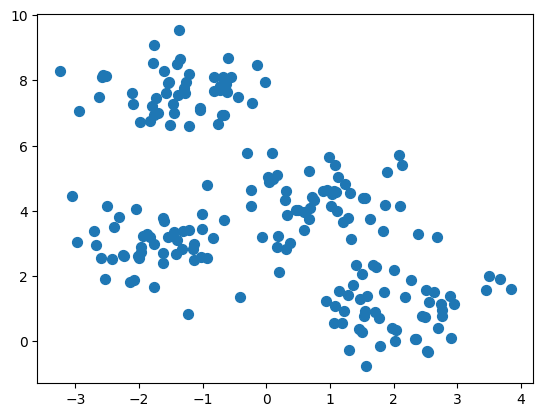

In [2]:
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=200, centers=4, cluster_std=0.75, random_state=0)
plt.scatter(x[:, 0], x[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans

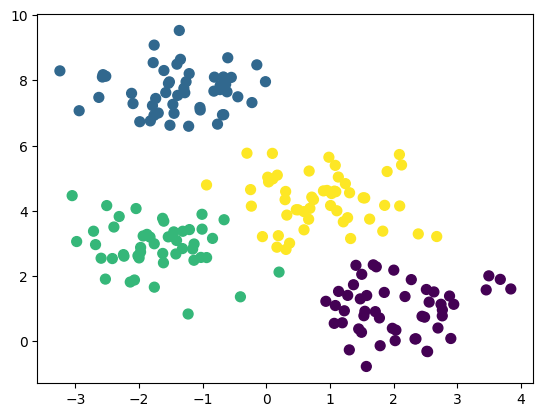

In [4]:
model = KMeans(n_clusters= 4, init = 'random', max_iter=300)
y = model.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50)

In [28]:
from scipy.spatial import distance

In [135]:
def sl_score(data, preds):
    sl_per_point = 0
    for j in data:
        d = {}
        a = 0
        for i in pd.unique(preds):
            dist_per_cl = 0
            count_per_cl = 0
            for k in data[preds == i]:
                dist_per_cl += distance.euclidean(j, k)
                count_per_cl += 1
            if y[np.where(np.all(np.isclose(data, j, atol=1e-6), axis=1))[0]] == i:
                a = dist_per_cl / count_per_cl
            else:
                d[f"{i}"] = dist_per_cl / count_per_cl
        b = min(d.values())
        sl_per_point += ((b - a) / max([a, b]))
    return sl_per_point / len(data)
                

In [136]:
sl_score(x, y)

0.6075183403078063

In [128]:
from sklearn.metrics import silhouette_score

In [137]:
silhouette_score(x, y)

np.float64(0.5995269990876508)